In [70]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
    # Read data into DataFrame from CSV file
    # cyclone_df = pd.read_csv("Cyclone_ML.csv")
    cyclone_df = pd.read_csv("../data/Cyclone_ML.csv")

    # Select features for machine learning and assign to X
    selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)", "WAVE_HEIGHT"]]
    # selected_features = cyclone_df[["CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD"]]
    X = selected_features

    # Set y to compass direction of cyclone based on wind direction degree
    y = cyclone_df["WIND_COMPASS"]
    # y = cyclone_df["MAX_REP_WIND_DIR"]
 

    print(X.shape, y.shape)

(1691, 8) (1691,)


In [72]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,1.0,20.0,-11.00,92.60,1001.0,12.9,2.064005,3.337484
1,1.0,20.0,-11.10,93.10,1002.0,12.9,1.950454,3.093691
2,1.0,20.0,-11.10,94.20,1003.0,12.9,1.829259,2.838769
3,1.0,20.0,-11.10,94.60,1000.0,12.9,2.171169,3.571799
4,1.0,20.0,-11.20,95.00,1002.0,12.9,1.950454,3.093691
...,...,...,...,...,...,...,...,...
1686,2.0,30.0,-14.30,126.40,986.0,20.6,3.306407,6.276868
1687,4.0,21.0,-12.73,130.61,999.0,20.6,2.272897,3.797903
1688,2.0,30.0,-12.54,130.72,993.0,18.0,2.801605,5.026852
1689,2.0,30.0,-12.41,130.99,995.0,18.0,2.638106,4.637562


In [73]:
y

0        E
1        E
2        S
3       SW
4        W
        ..
1686     W
1687     N
1688    SW
1689    SW
1690    SW
Name: WIND_COMPASS, Length: 1691, dtype: object

In [74]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

In [76]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
training_score = rf.score(X_train_scaled, y_train)
testing_score = rf.score(X_test_scaled, y_test)
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.998422712933754
Testing Data Score: 0.34278959810874704


In [77]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [78]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.2862027496972872, 'LON'),
 (0.2616545853872369, 'LAT'),
 (0.10499586996840775, 'MAX_WIND_SPD'),
 (0.10145548286533825, 'CENTRAL_INDEX (CI)'),
 (0.0999732020069699, 'CENTRAL_PRES'),
 (0.09704797482863804, 'WAVE_HEIGHT'),
 (0.026225188461698325, 'SURFACE_CODE'),
 (0.02244494678442368, 'CYC_TYPE')]

In [79]:
# Make predictions with the model
predictions = rf.predict(X_test_scaled)

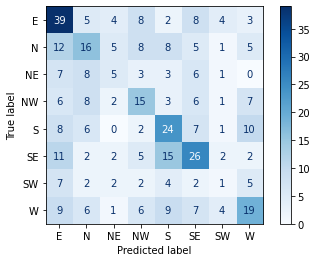

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_scaled, y_test, cmap="Blues")
plt.show()

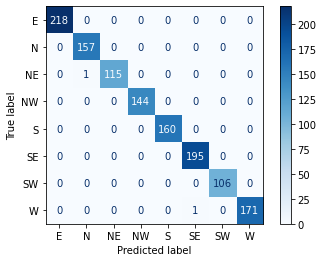

In [81]:
plot_confusion_matrix(rf, X_train_scaled, y_train, cmap="Blues")
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["E", "N", "NE", "NW", "S", "SE", "SW", "W"]))

              precision    recall  f1-score   support

           E       0.39      0.53      0.45        73
           N       0.30      0.27      0.28        60
          NE       0.24      0.15      0.19        33
          NW       0.31      0.31      0.31        48
           S       0.35      0.41      0.38        58
          SE       0.39      0.40      0.39        65
          SW       0.07      0.04      0.05        25
           W       0.37      0.31      0.34        61

    accuracy                           0.34       423
   macro avg       0.30      0.30      0.30       423
weighted avg       0.33      0.34      0.33       423



In [83]:
joblib.dump(rf, 'cyclone_RF.smd')
print("Model is saved.")

Model is saved.


In [84]:
joblib.dump(rf, '../cyclone_RF.smd')
print("Model is saved.")

Model is saved.
